In [19]:
import pandas as pd
import pandas_datareader.data as web   
import datetime
start = datetime.datetime(2020,1,1)
end = datetime.date.today()
apple = web.DataReader("AAPL", "yahoo", start, end)

In [20]:
apple.head(10)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,75.150002,73.797501,74.059998,75.087502,135480400.0,74.573036
2020-01-03,75.144997,74.125000,74.287498,74.357498,146322800.0,73.848030
2020-01-06,74.989998,73.187500,73.447502,74.949997,118387200.0,74.436470
2020-01-07,75.224998,74.370003,74.959999,74.597504,108872000.0,74.086395
2020-01-08,76.110001,74.290001,74.290001,75.797501,132079200.0,75.278160
2020-01-09,77.607498,76.550003,76.809998,77.407501,170108400.0,76.877136
2020-01-10,78.167503,77.062500,77.650002,77.582497,140644800.0,77.050926
2020-01-13,79.267502,77.787498,77.910004,79.239998,121532000.0,78.697075
2020-01-14,79.392502,78.042503,79.175003,78.169998,161954400.0,77.634407


Populating the interactive namespace from numpy and matplotlib


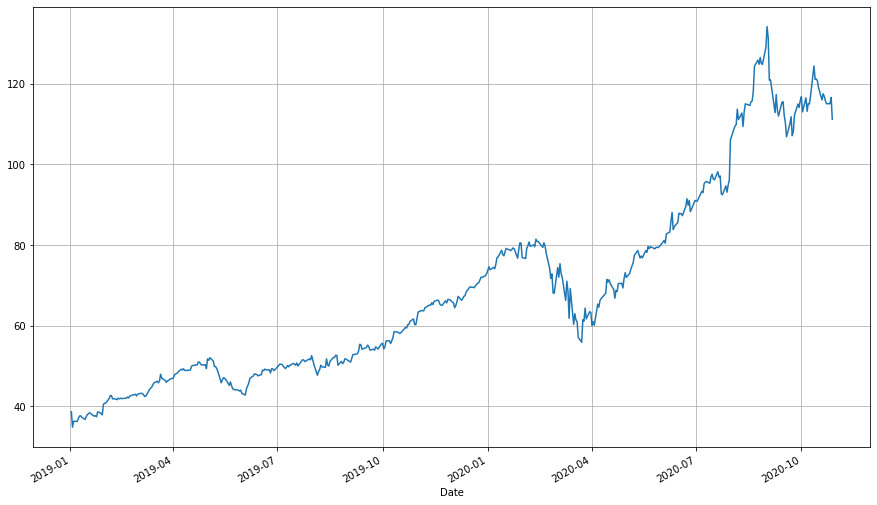

In [10]:
import matplotlib.pyplot as plt   # Import matplotlib
# This line is necessary for the plot to appear in a Jupyter notebook
%matplotlib inline
 
# Control the default size of figures in this Jupyter notebook
%pylab inline
 
pylab.rcParams['figure.figsize'] = (15, 9)   # Change the size of plots
 
apple["Adj Close"].plot(grid = True) # Plot the adjusted closing price of AAPL

# Section 2

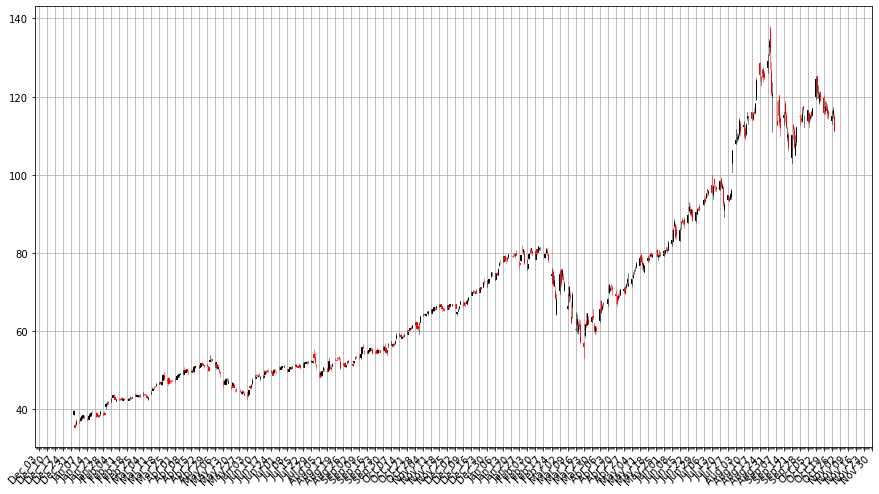

In [15]:
from matplotlib.dates import DateFormatter, WeekdayLocator,\
    DayLocator, MONDAY
from mplfinance.original_flavor import candlestick_ohlc
 
def pandas_candlestick_ohlc(dat, stick = "day", otherseries = None):
    """
    :param dat: pandas DataFrame object with datetime64 index, and float columns "Open", "High", "Low", and "Close", likely created via DataReader from "yahoo"
    :param stick: A string or number indicating the period of time covered by a single candlestick. Valid string inputs include "day", "week", "month", and "year", ("day" default), and any numeric input indicates the number of trading days included in a period
    :param otherseries: An iterable that will be coerced into a list, containing the columns of dat that hold other series to be plotted as lines
 
    This will show a Japanese candlestick plot for stock data stored in dat, also plotting other series if passed.
    """
    mondays = WeekdayLocator(MONDAY)        # major ticks on the mondays
    alldays = DayLocator()              # minor ticks on the days
    dayFormatter = DateFormatter('%d')      # e.g., 12
 
    # Create a new DataFrame which includes OHLC data for each period specified by stick input
    transdat = dat.loc[:,["Open", "High", "Low", "Close"]]
    if (type(stick) == str):
        if stick == "day":
            plotdat = transdat
            stick = 1 # Used for plotting
        elif stick in ["week", "month", "year"]:
            if stick == "week":
                transdat["week"] = pd.to_datetime(transdat.index).map(lambda x: x.isocalendar()[1]) # Identify weeks
            elif stick == "month":
                transdat["month"] = pd.to_datetime(transdat.index).map(lambda x: x.month) # Identify months
            transdat["year"] = pd.to_datetime(transdat.index).map(lambda x: x.isocalendar()[0]) # Identify years
            grouped = transdat.groupby(list(set(["year",stick]))) # Group by year and other appropriate variable
            plotdat = pd.DataFrame({"Open": [], "High": [], "Low": [], "Close": []}) # Create empty data frame containing what will be plotted
            for name, group in grouped:
                plotdat = plotdat.append(pd.DataFrame({"Open": group.iloc[0,0],
                                            "High": max(group.High),
                                            "Low": min(group.Low),
                                            "Close": group.iloc[-1,3]},
                                           index = [group.index[0]]))
            if stick == "week": stick = 5
            elif stick == "month": stick = 30
            elif stick == "year": stick = 365
 
    elif (type(stick) == int and stick >= 1):
        transdat["stick"] = [np.floor(i / stick) for i in range(len(transdat.index))]
        grouped = transdat.groupby("stick")
        plotdat = pd.DataFrame({"Open": [], "High": [], "Low": [], "Close": []}) # Create empty data frame containing what will be plotted
        for name, group in grouped:
            plotdat = plotdat.append(pd.DataFrame({"Open": group.iloc[0,0],
                                        "High": max(group.High),
                                        "Low": min(group.Low),
                                        "Close": group.iloc[-1,3]},
                                       index = [group.index[0]]))
 
    else:
        raise ValueError('Valid inputs to argument "stick" include the strings "day", "week", "month", "year", or a positive integer')
 
 
    # Set plot parameters, including the axis object ax used for plotting
    fig, ax = plt.subplots()
    fig.subplots_adjust(bottom=0.2)
    if plotdat.index[-1] - plotdat.index[0] < pd.Timedelta('730 days'):
        weekFormatter = DateFormatter('%b %d')  # e.g., Jan 12
        ax.xaxis.set_major_locator(mondays)
        ax.xaxis.set_minor_locator(alldays)
    else:
        weekFormatter = DateFormatter('%b %d, %Y')
    ax.xaxis.set_major_formatter(weekFormatter)
 
    ax.grid(True)
 
    # Create the candelstick chart
    candlestick_ohlc(ax, list(zip(list(date2num(plotdat.index.tolist())), plotdat["Open"].tolist(), plotdat["High"].tolist(),
                      plotdat["Low"].tolist(), plotdat["Close"].tolist())),
                      colorup = "black", colordown = "red", width = stick * .4)
 
    # Plot other series (such as moving averages) as lines
    if otherseries != None:
        if type(otherseries) != list:
            otherseries = [otherseries]
        dat.loc[:,otherseries].plot(ax = ax, lw = 1.3, grid = True)
 
    ax.xaxis_date()
    ax.autoscale_view()
    plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
 
    plt.show()
 
pandas_candlestick_ohlc(apple)

# Section 3

In [24]:
import pandas_datareader.data as web
import datetime
import yfinance as yf
import pandas as pd

yf.pdr_override()
 
start=datetime.datetime(2020, 1, 1)
end=datetime.datetime.today()
 
apple=web.get_data_yahoo('AAPL',start,end)
microsoft=web.get_data_yahoo('MSFT',start,end)
google=web.get_data_yahoo('GOOG',start,end)
 

stocks = pd.DataFrame({"AAPL": apple["Adj Close"],
                      "MSFT": microsoft["Adj Close"],
                      "GOOG": google["Adj Close"]})   
stocks     # adj close就是等于adjusted close


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,AAPL,MSFT,GOOG
Date,,,
2020-01-02,74.573036,159.352386,1367.369995
2020-01-03,73.848030,157.368179,1360.660034
2020-01-06,74.436470,157.774948,1394.209961
2020-01-07,74.086395,156.336395,1393.339966
2020-01-08,75.278160,158.826569,1404.319946
...,...,...,...
2020-10-22,115.750000,214.889999,1615.329956
2020-10-23,115.040001,216.229996,1641.000000
2020-10-26,115.050003,210.080002,1590.449951


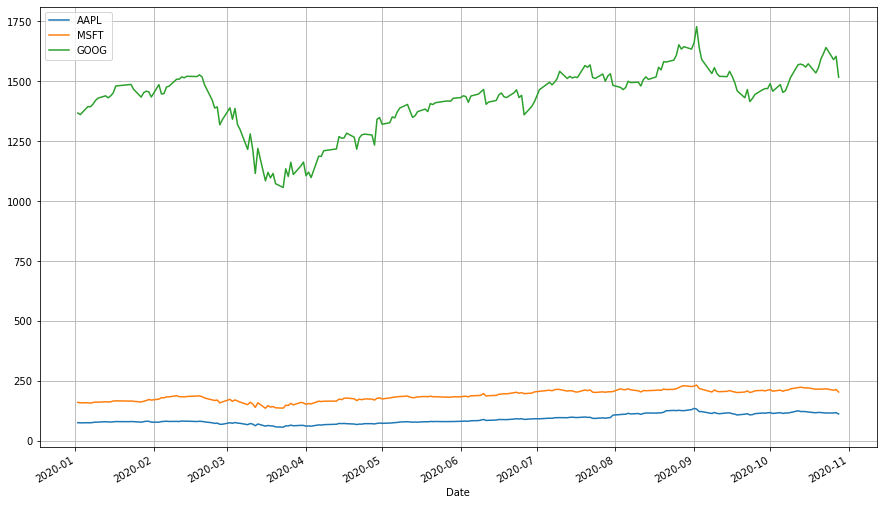

In [25]:
stocks.plot(grid = True)

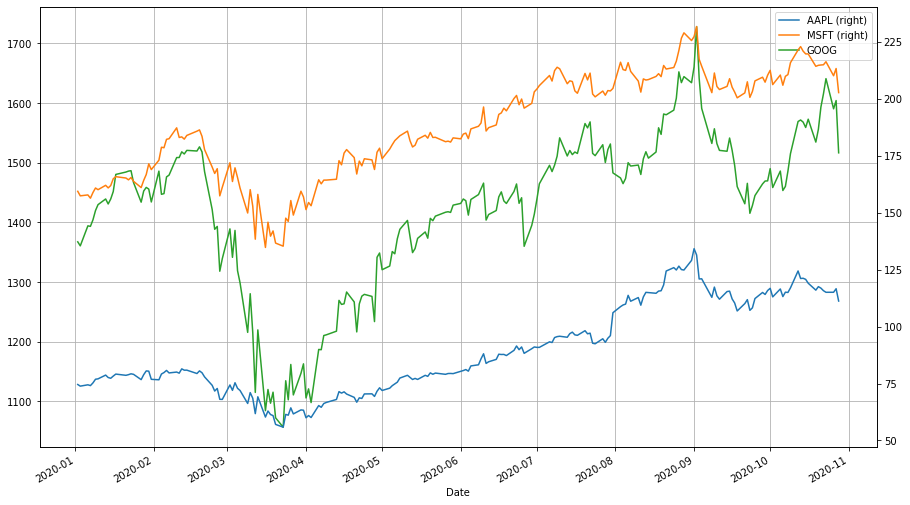

In [26]:
# use a secondary y to put differnt priced stocks in the same grid. 
stocks.plot(secondary_y = ["AAPL", "MSFT"], grid = True)

# Section 4 value change analysis

In [27]:
# df.apply(arg) will apply the function arg to each column in df, and return a DataFrame with the result
# Recall that lambda x is an anonymous function accepting parameter x; in this case, x will be a pandas Series object
stock_return = stocks.apply(lambda x: x / x[0])
stock_return.head()

,AAPL,MSFT,GOOG
Date,,,
2020-01-02,1.000000,1.000000,1.000000
2020-01-03,0.990278,0.987548,0.995093
2020-01-06,0.998169,0.990101,1.019629
2020-01-07,0.993474,0.981073,1.018993
2020-01-08,1.009455,0.996700,1.027023


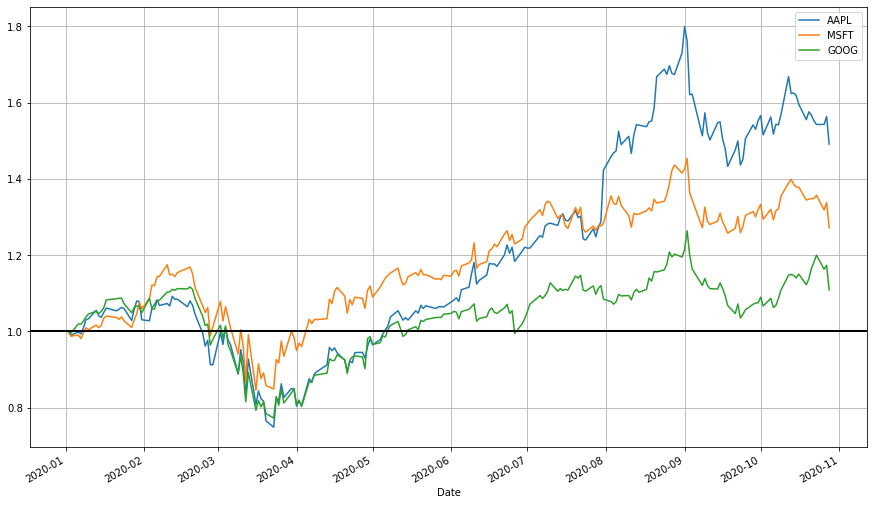

In [28]:
stock_return.plot(grid = True).axhline(y = 1, color = "black", lw = 2)

In [29]:
# 利用对数差异来观察股价变化。
# 使用对数差异的好处是该差异值可以被解释为股票的百分比差异，但是不受分母的影响。
import numpy as np 
stock_change = stocks.apply(lambda x: np.log(x) - np.log(x.shift(1))) # shift moves dates back by 1.
stock_change.head()


,AAPL,MSFT,GOOG
Date,,,
2020-01-02,NaN,NaN,NaN
2020-01-03,-0.009770,-0.012530,-0.004919
2020-01-06,0.007937,0.002581,0.024358
2020-01-07,-0.004714,-0.009160,-0.000624
2020-01-08,0.015958,0.015803,0.007849


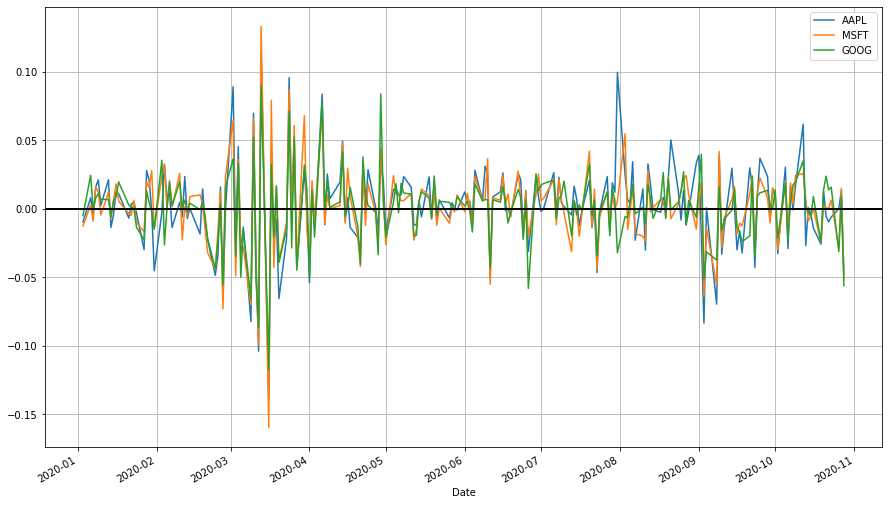

In [30]:
stock_change.plot(grid = True).axhline(y = 0, color = "black", lw = 2)

# Section 5: MIA 

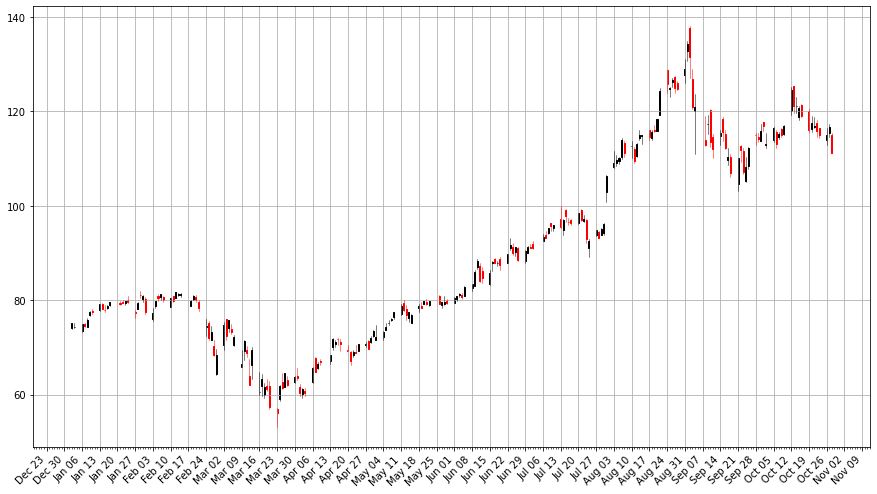

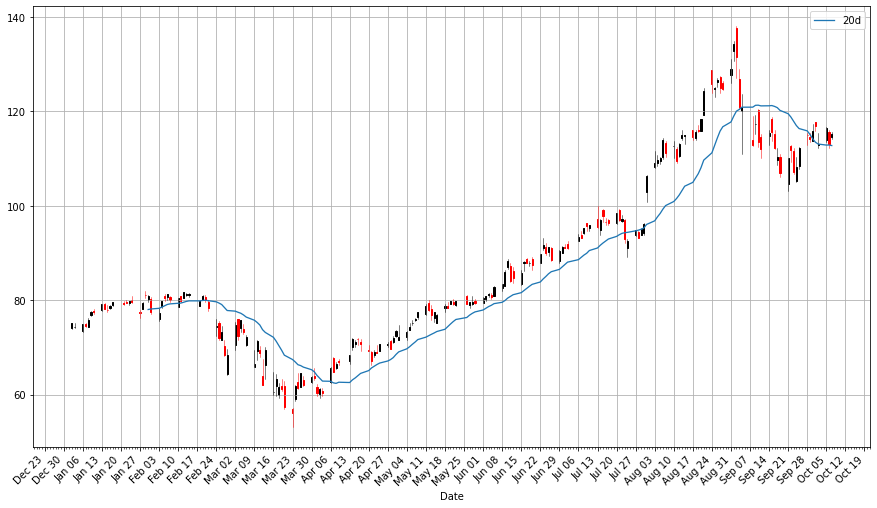

In [32]:
import pandas as pd  # 不加这个，会提示NameError: name 'pd' is not defined
pandas_candlestick_ohlc(apple)
apple["20d"] = np.round(apple["Close"].rolling(window = 20, center = False).mean(), 2)
pandas_candlestick_ohlc(apple.loc['2019-01-01':'2020-10-07',:], otherseries = "20d")

[*********************100%***********************]  1 of 1 completed


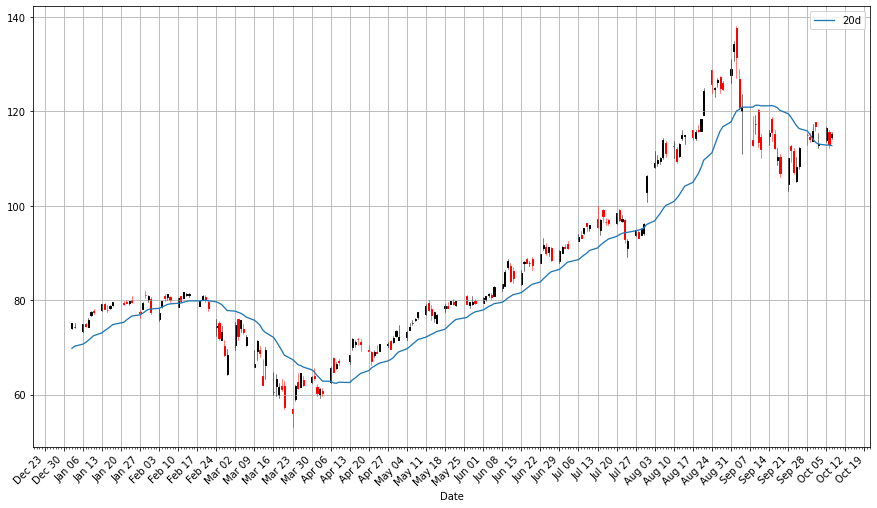

In [34]:
# to extend time frame and include the pre-days into calculation
import pandas_datareader.data as web
import datetime
import yfinance as yf
yf.pdr_override()
 
start = datetime.datetime(2018,1,1)
apple=web.get_data_yahoo('AAPL',start,end)
apple["20d"] = np.round(apple["Close"].rolling(window = 20, center = False).mean(), 2)
 
pandas_candlestick_ohlc(apple.loc['2020-01-01':'2020-10-07',:], otherseries = "20d")

# section Valuation

In [43]:
# use pdr to get real time market information. can be done thourgh yf by override
from pandas_datareader import data as pdr
import yfinance as yf

yf.pdr_override() # <== that's all it takes :-)

# download dataframe
apple = pdr.get_data_yahoo("AAPL", start="2020-01-01", end="2020-10-15")
print(apple.head())

[*********************100%***********************]  1 of 1 completed
                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2020-01-02  74.059998  75.150002  73.797501  75.087502  74.573036  135480400
2020-01-03  74.287498  75.144997  74.125000  74.357498  73.848030  146322800
2020-01-06  73.447502  74.989998  73.187500  74.949997  74.436470  118387200
2020-01-07  74.959999  75.224998  74.370003  74.597504  74.086395  108872000
2020-01-08  74.290001  76.110001  74.290001  75.797501  75.278160  132079200


[*********************100%***********************]  2 of 2 completed


In [53]:
print(data.head)

<bound method NDFrame.head of                   MSFT                                                \
                  Open        High         Low       Close    Volume   
Date                                                                   
2020-01-02  157.526911  159.461519  157.080466  159.352386  22622100   
2020-01-03  157.070559  158.687685  156.812601  157.368179  21116200   
2020-01-06  155.840340  157.844403  155.274831  157.774948  20813700   
2020-01-07  158.062669  158.409898  156.078453  156.336395  21634100   
2020-01-08  157.675720  159.530972  156.703458  158.826569  27746500   
...                ...         ...         ...         ...       ...   
2020-10-22  213.929993  216.059998  211.699997  214.889999  22351500   
2020-10-23  215.029999  216.279999  213.160004  216.229996  18879600   
2020-10-26  213.850006  216.339996  208.100006  210.080002  37111600   
2020-10-27  211.589996  214.669998  210.330002  213.250000  36700300   
2020-10-28  207.669998  208.839996

In [1]:
import yfinance as yf
msft = yf.Ticker("MSFT")

# get stock info
print(msft.info)

{'zip': '98052-6399', 'sector': 'Technology', 'fullTimeEmployees': 163000, 'longBusinessSummary': 'Microsoft Corporation develops, licenses, and supports software, services, devices, and solutions worldwide. Its Productivity and Business Processes segment offers Office, Exchange, SharePoint, Microsoft Teams, Office 365 Security and Compliance, and Skype for Business, as well as related Client Access Licenses (CAL); Skype, Outlook.com, and OneDrive; LinkedIn that includes Talent, Learning, Sales, and Marketing solutions, as well as premium subscriptions; and Dynamics 365, a set of cloud-based and on-premises business solutions for small and medium businesses, large organizations, and divisions of enterprises. Its Intelligent Cloud segment licenses SQL and Windows Servers, Visual Studio, System Center, and related CALs; GitHub that provides a collaboration platform and code hosting service for developers; and Azure, a cloud platform. It also offers support services and Microsoft consulti

In [15]:
print(msft.quarterly_cashflow)

                                             2020-09-30    2020-06-30  \
Investments                                2.100000e+09  3.173000e+09   
Change To Liabilities                     -2.749000e+09  1.180200e+10   
Total Cashflows From Investing Activities -5.371000e+09 -4.462000e+09   
Total Cash From Financing Activities      -1.028900e+10 -1.226200e+10   
Change To Operating Activities            -2.823000e+09  6.430000e+08   
Issuance Of Stock                          5.450000e+08  3.400000e+08   
Net Income                                 1.389300e+10  1.120200e+10   
Change In Cash                             3.629000e+09  1.866000e+09   
Repurchase Of Stock                       -6.743000e+09 -5.791000e+09   
Effect Of Exchange Rate                   -4.600000e+07 -8.300000e+07   
Total Cash From Operating Activities       1.933500e+10  1.867300e+10   
Depreciation                               2.645000e+09  3.008000e+09   
Other Cashflows From Investing Activities -2.083000

In [34]:
display(msft.balance_sheet.head())

,2020-06-30,2019-06-30,2018-06-30,2017-06-30
Intangible Assets,7.038000e+09,7.750000e+09,8.053000e+09,1.010600e+10
Total Liab,1.830070e+11,1.842260e+11,1.761300e+11,1.626010e+11
Total Stockholder Equity,1.183040e+11,1.023300e+11,8.271800e+10,8.771100e+10
Other Current Liab,4.600100e+10,4.586000e+10,3.819500e+10,3.087900e+10
Total Assets,3.013110e+11,2.865560e+11,2.588480e+11,2.503120e+11


In [35]:
msft.balance_sheet.reset_index()
a = msft.balance_sheet.loc['Intangible Assets','2019-06-30'].values
print(a)

[7.75e+09]
